#### EDA And Feature Engineering Flight Price Prediction

# 1 Data Collection and Understanding about features and Target variable

- FEATURES
-The various features of the dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines. 
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities. 
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels. 
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities. 
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time. 
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities. 
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy. 
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date. 
11) Price: Target variable stores information of the ticket price.

# 2 DATA EXPLORATION
- In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.
Below are tasks to be performed in EDA:
M
1. Importing Libraries

2. Data Cleaning for EDA Report

3. Exploratory Data Analysis (EDA) on all Features

# 2.1 Import Libraries

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#reading the excel file
df = pd.read_excel('flight_price.xlsx')

In [3]:
# defing the number of coloumns to be displayed
pd.options.display.max_columns = 500

In [4]:
# taking basic idea of dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

From above description we came to know that there are some Null values present and all the data are object datatype ,only Price is of integer type

# 2.2 Data Cleaning

In [7]:
# checking the Null Values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# checking the datya types
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [10]:
# Our machine Learning Model cant understand date and time there we extract the date in another three coloumn separately for date,month and year
# Extracting date of journey in separate coloumn for date,month,year
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [11]:
# changing the data type to int
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [12]:
# Dropping the 'Date_of_Journey' Coloumn
df.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


In [14]:
df['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [15]:
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [16]:
# Exthours and Arrival+minutesracting Arrival Time separately in two new coloumns that is Arival_
df['Arrival_hours'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_minutes'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)

In [17]:
df['Arrival_hours'] = df['Arrival_hours'].astype(int)
df['Arrival_minutes'] = df['Arrival_minutes'].astype(int)

In [18]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Arrival_hours       int32
Arrival_minutes     int32
dtype: object

In [19]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25


In [20]:
# Extarcting the Departure hour and Min frim Dep_Time 
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_hours    10683 non-null  int32 
 12  Arrival_minutes  10683 non-null  int32 
 13  Dept_hour        10683 non-null  int32 
 14  Dept_min         10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [22]:
# Route Does affecting our inshight therefore I am Dropping it
df.drop('Route',axis=1,inplace=True)

In [23]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [24]:
# Now we extract duration in hours and minute separately in new coloumns
df['duration_hours'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['duration_minutes'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [25]:
# checking for null  values in duration hours coloumns
df['duration_hours'].isnull().sum()

0

In [26]:
# checking wheter there is any wrong format value is present or not
df['duration_hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [27]:
for i in df:
    index = df.loc[df['duration_hours'] == '5m']
index

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dept_hour,Dept_min,duration_hours,duration_minutes
6474,Air India,Mumbai,Hyderabad,5m,2 stops,No info,17327,6,3,2019,16,55,16,50,5m,NaN


In [28]:
# at index 6474 there present a wrong format data in Duration hours

In [29]:
# Correcting the format of wrong data
df['duration_hours']=df['duration_hours'].replace('5m',5)

In [30]:
df['duration_minutes'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [31]:
# in some rows duration is exactly in hours there is no minutes there we have some null values
# Replacing null values with 0 to show that 0 minutes
df['duration_minutes']=df['duration_minutes'].replace(np.nan,0)

In [32]:
df['duration_hours'].isnull().sum()

0

In [33]:
# Converting in int dtype
df['duration_hours'] = pd.to_numeric(df['duration_hours'])
df['duration_minutes'] = pd.to_numeric(df['duration_minutes'])

In [34]:
#Converting duration_hours in minutes and add both duration hours and minutes to get a singles columns giving total duration time in minutes
df['Total_Duration_time_in_minutes'] = ((60 * df['duration_hours']) + df['duration_minutes'])

In [35]:
#now drop all the unwanted coloumns
df.drop(['Duration','duration_hours','duration_minutes'],axis = 1,inplace = True)

In [36]:
# total_Stops have categoical data 
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [37]:
# finding mode of Total stops to fill out the null values
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [38]:
# mapping the Total_stops to get non-null and int values
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [39]:
df['Total_Stops'].isnull().sum()

0

In [40]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dept_hour,Dept_min,Total_Duration_time_in_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,285


Now coloumns Airline,Source and Destination have categorical data there do OneHotEncoding to convert in Numerical features

In [41]:
# Checking uniques entries in Airlines
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [42]:
# Checking uniques entries in Source
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [43]:
# Checking uniques entries in Destination
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [44]:
#importing sklearn.preprocessing to do Onehotencoding
from sklearn.preprocessing import OneHotEncoder

In [45]:
#making a instance for onehotencoding
encoder=OneHotEncoder()

In [46]:
#applying one hot encoding
#encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

In [47]:
#encoded_df = pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

In [48]:
#Concating all the Ecoded data with dataframe 
#df = pd.concat([df,encoded_df],axis = 1)

In [49]:
#Dropping the Unwanted coloumns
#df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [50]:
#df

In [51]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [52]:
#Additional_Info is not usefull and not giving any statistical inshights therefore we drop it
df = df.drop('Additional_Info',axis = 1)

# 2.3 Dataset is cleaned and ready for EDA

In [53]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dept_hour,Dept_min,Total_Duration_time_in_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,16,50,285


In [54]:
df.describe()

,Total_Stops,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dept_hour,Dept_min,Total_Duration_time_in_minutes
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,13.348778,24.690630,12.490686,24.411214,643.120846
std,0.675199,4611.359167,8.479277,1.164357,0.0,6.859125,16.506036,5.748650,18.767980,507.835322
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,75.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,170.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,520.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,930.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Airline                         10683 non-null  object
 1   Source                          10683 non-null  object
 2   Destination                     10683 non-null  object
 3   Total_Stops                     10683 non-null  int64 
 4   Price                           10683 non-null  int64 
 5   Date                            10683 non-null  int32 
 6   Month                           10683 non-null  int32 
 7   Year                            10683 non-null  int32 
 8   Arrival_hours                   10683 non-null  int32 
 9   Arrival_minutes                 10683 non-null  int32 
 10  Dept_hour                       10683 non-null  int32 
 11  Dept_min                        10683 non-null  int32 
 12  Total_Duration_time_in_minutes  10683 non-null

# 2.4 Exploratory Data Analysis (EDA)

In [64]:
numerical_features = [features for features in df.columns if df[features].dtype!='O']

In [65]:
numerical_features

['Total_Stops',
 'Price',
 'Date',
 'Month',
 'Year',
 'Arrival_hours',
 'Arrival_minutes',
 'Dept_hour',
 'Dept_min',
 'Total_Duration_time_in_minutes']

In [67]:
# Checking the Distribution of each coloumns

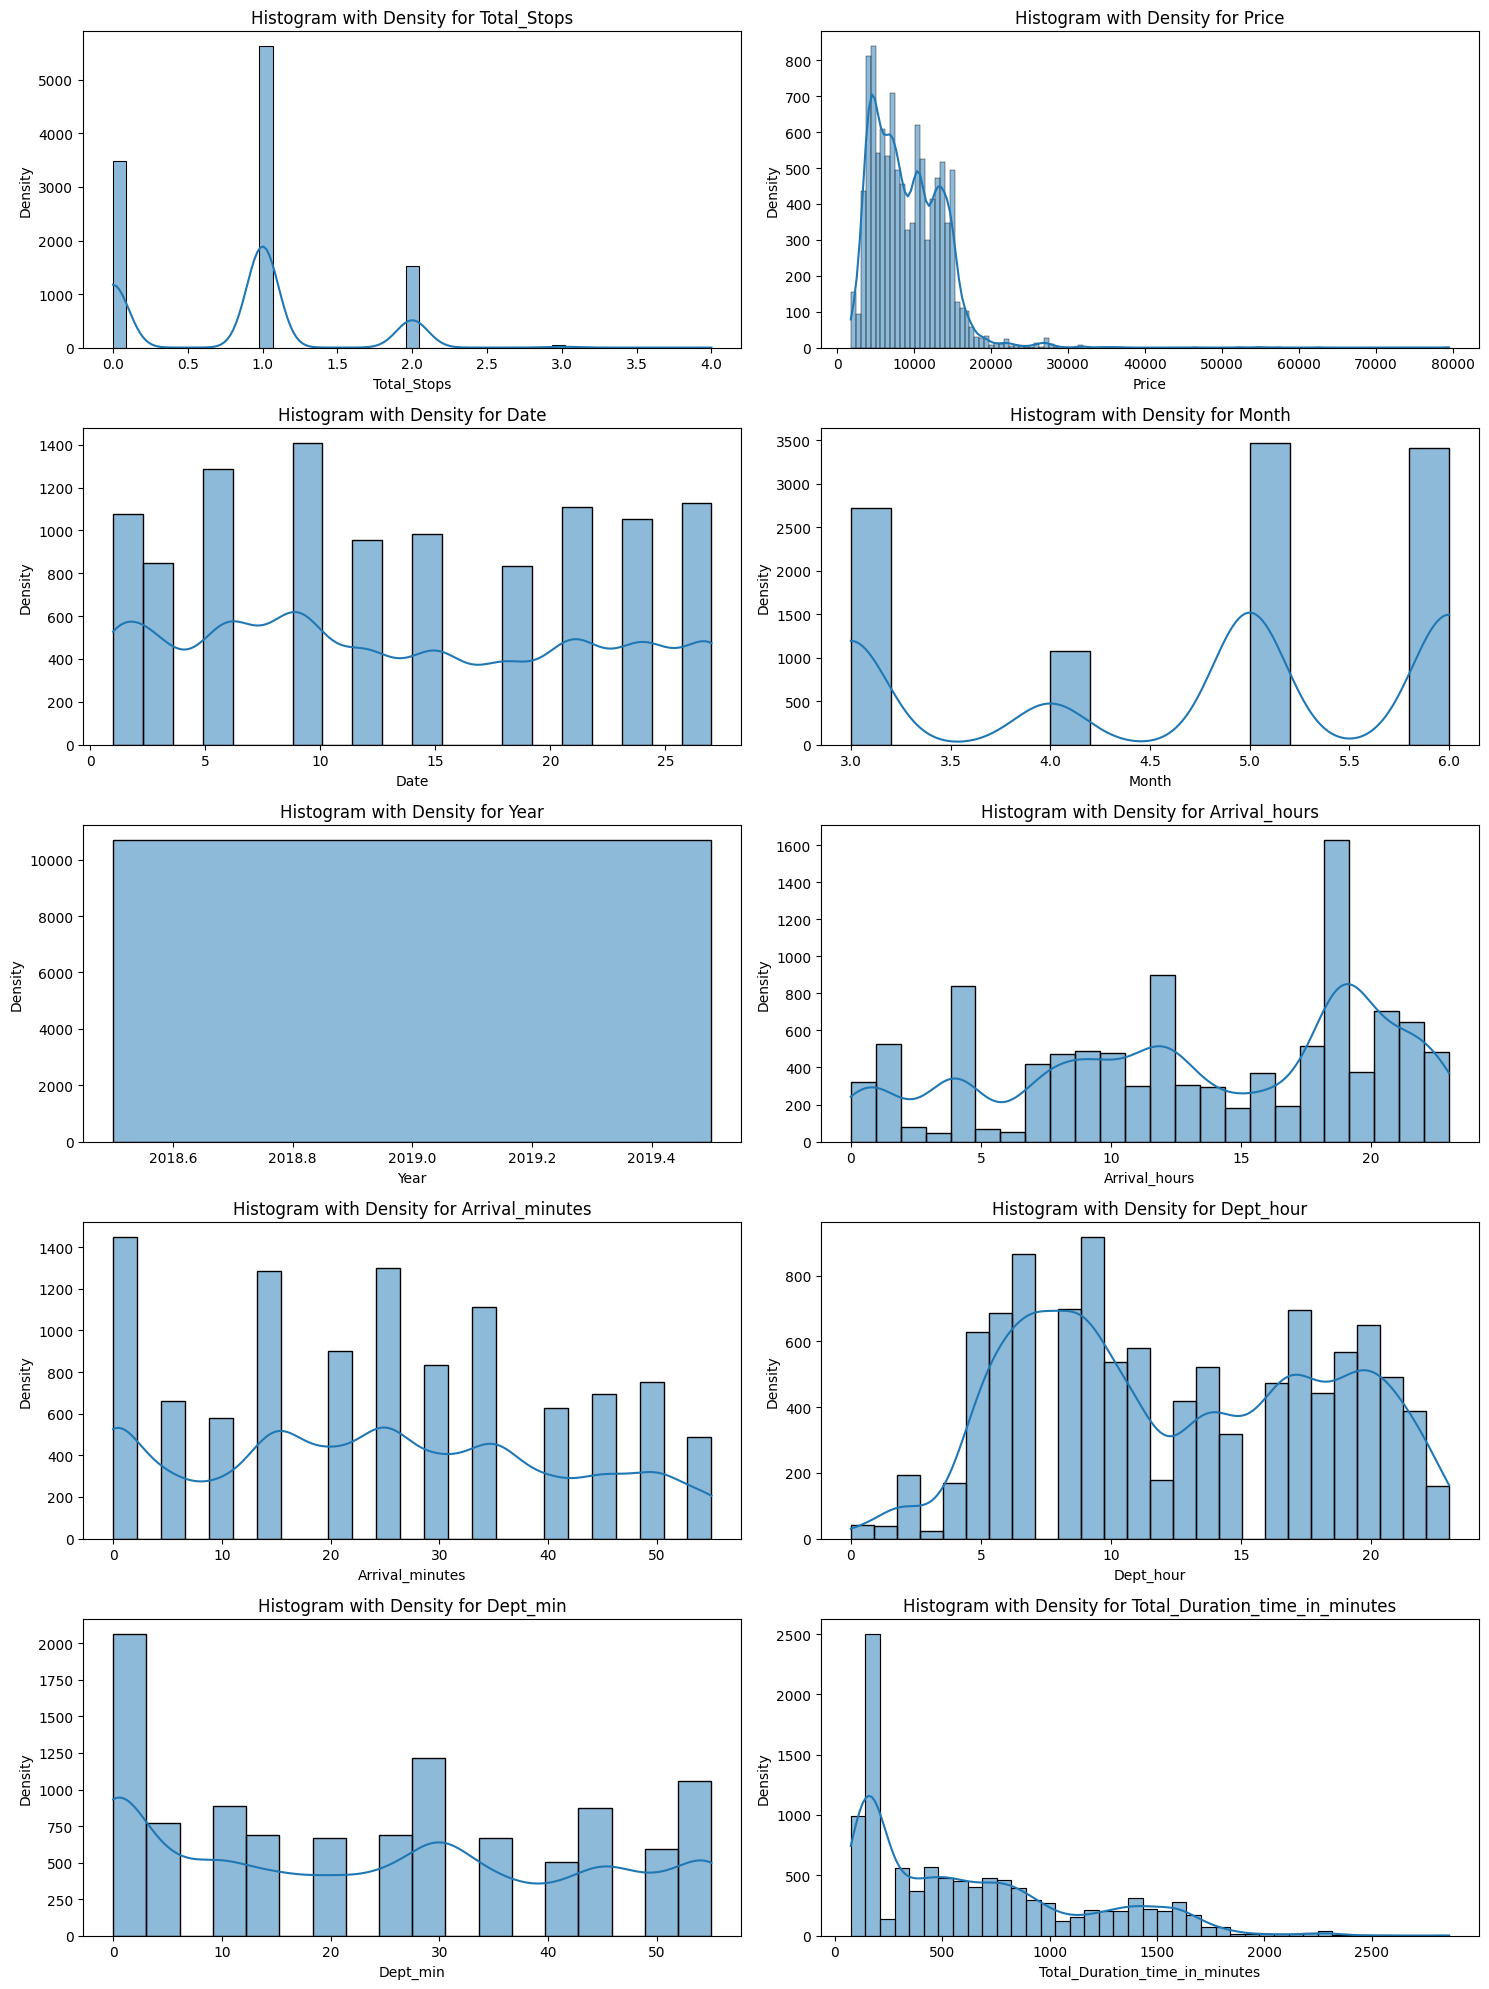

In [68]:
# Set the figure size and arrange plots horizontally in pairs
fig, axes = plt.subplots(nrows=len(numerical_features) // 2, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Remove any empty subplots if the number of columns is odd
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [69]:
# Checking the range 
# Find the minimum and maximum price
min_price = df['Price'].min()
max_price = df['Price'].max()

# Calculate the price range
price_range = max_price - min_price

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")

Minimum Price: 1759
Maximum Price: 79512
Price Range: 77753


# price of flights vary by airline

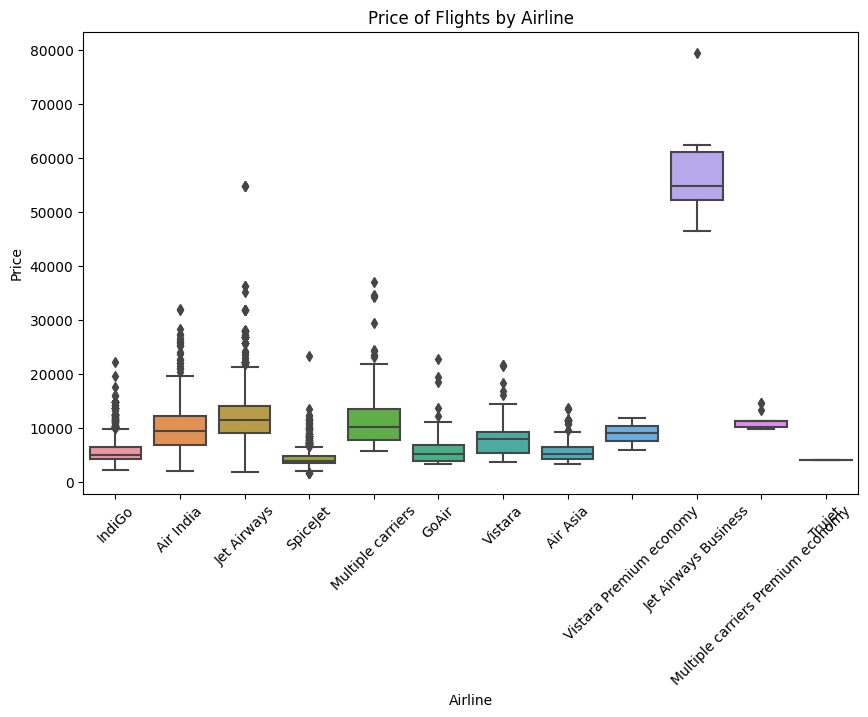

In [70]:
# Create a boxplot to compare prices by airline
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Airline', y='Price', data=df)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.title('Price of Flights by Airline')
plt.show()

# Analyze the peak season

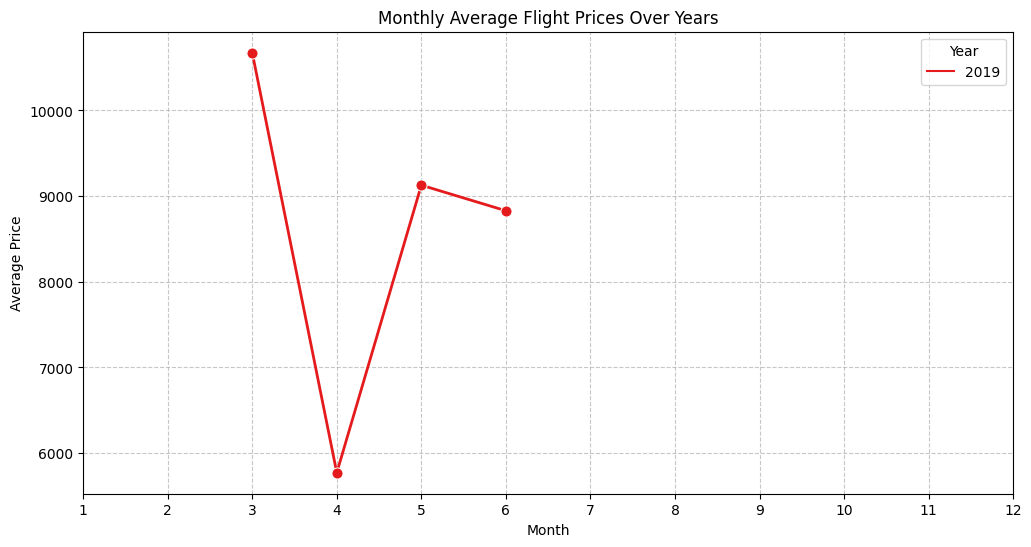

In [71]:
# Calculate monthly average prices
monthly_avg_prices = df.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Create an line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_prices, x='Month', y='Price', hue='Year', marker='o', palette='Set1', linewidth=2, markersize=8)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Monthly Average Flight Prices Over Years')
plt.xticks(range(1, 13))
plt.legend(title='Year', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Identify the factors that affect flight prices

<AxesSubplot: >

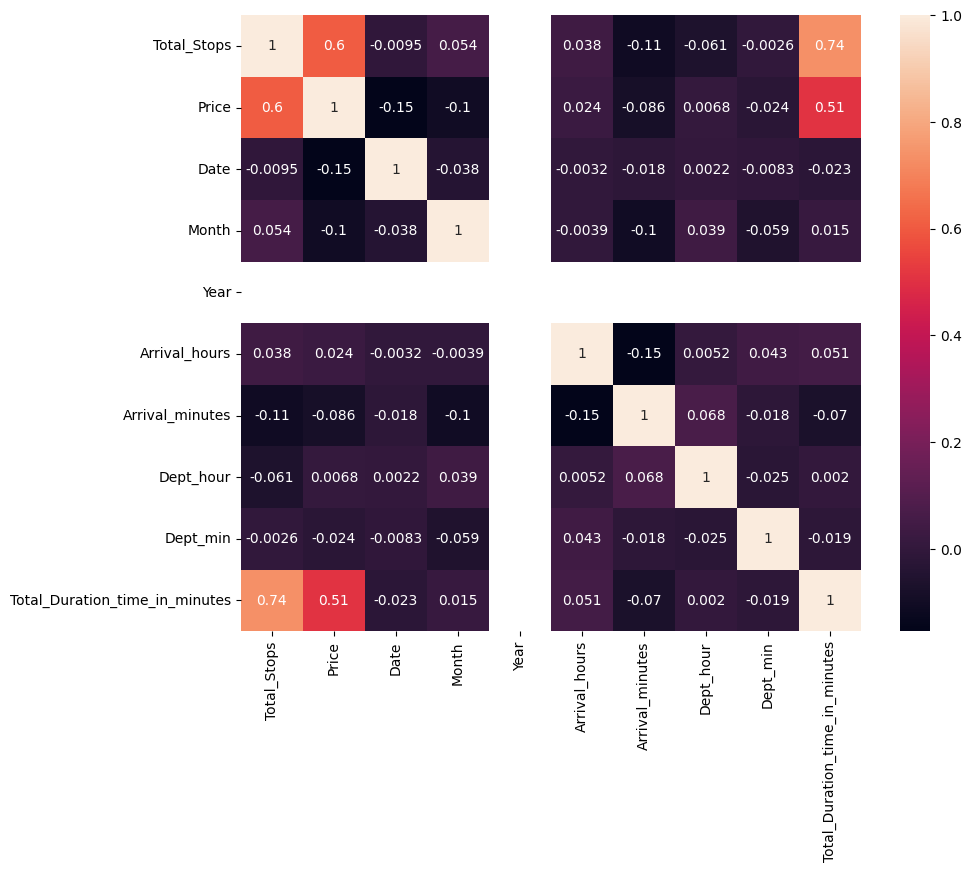

In [72]:
plt.figure(figsize=(10, 8))  
sns.heatmap(df[numerical_features].corr(),annot = True)

We can clearly see that the Price have strong correlation withj Total_Stops and Total_Duration_time_in_minutes

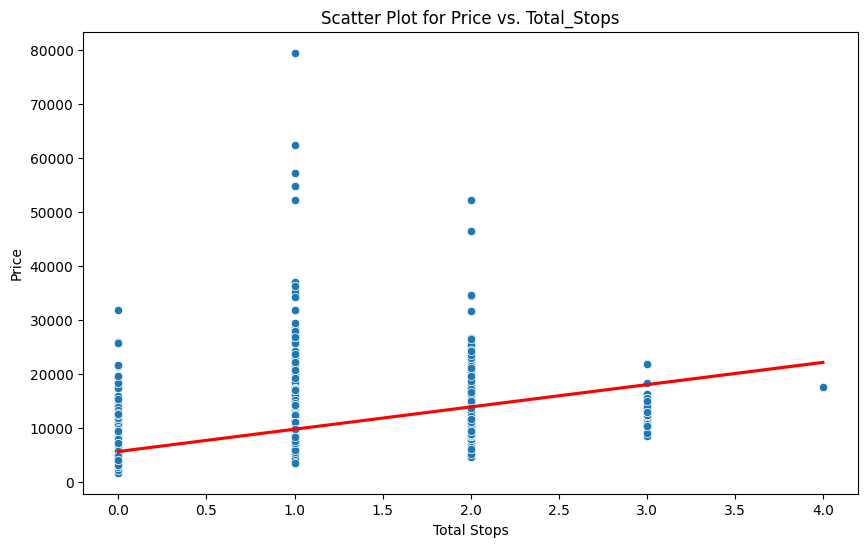

In [73]:
# Create a scatter plot with regression line for Price vs. Total_Stops
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Stops', y='Price', data=df)
sns.regplot(x='Total_Stops', y='Price', data=df, scatter=False, color='red')  # Add a regression line
plt.title('Scatter Plot for Price vs. Total_Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

In [58]:
selected_columns = ['Price', 'Total_Stops', 'Total_Duration_time_in_minutes']

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()

# Print or use the correlation matrix
correlation_matrix

,Price,Total_Stops,Total_Duration_time_in_minutes
Price,1.000000,0.603883,0.506495
Total_Stops,0.603883,1.000000,0.738158
Total_Duration_time_in_minutes,0.506495,0.738158,1.000000


In [59]:
# Calculate the correlation coefficients between selected columns
cm = np.corrcoef(df[selected_columns].values.T)

In [60]:
cm

array([[1.        , 0.60388306, 0.50649526],
       [0.60388306, 1.        , 0.73815848],
       [0.50649526, 0.73815848, 1.        ]])

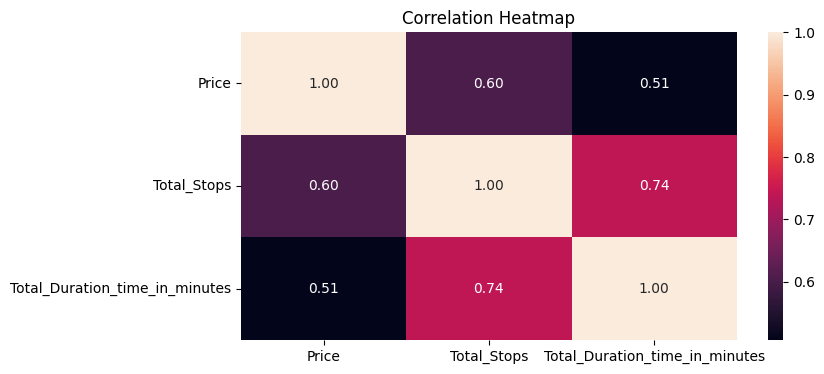

In [61]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# we see that Total_Stops have largest correlation with Price

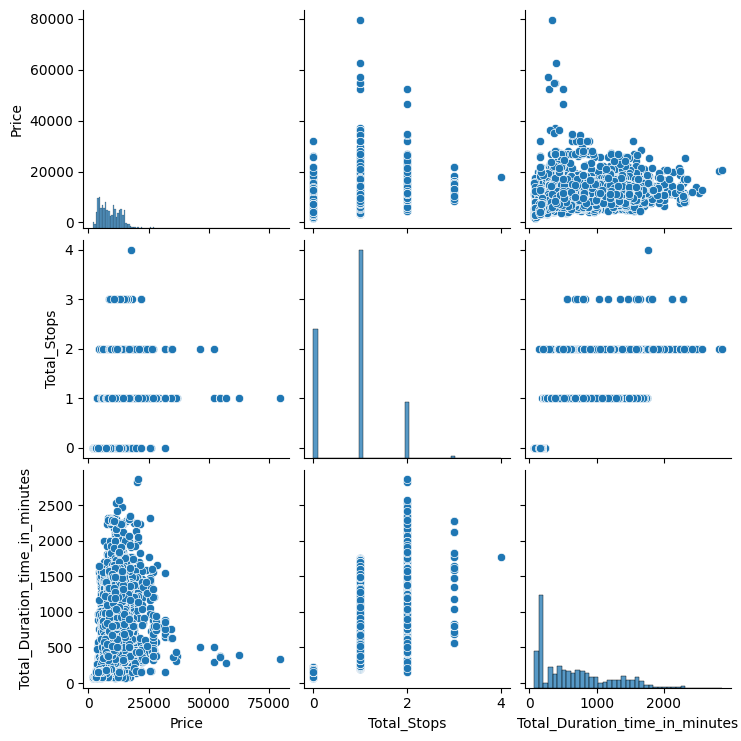

In [62]:
sns.pairplot(df[selected_columns])